In [1]:
# Dependencies
import requests as req
import json
import zipcodes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Google API Key
gkey = ""

In [3]:
# get latitude and longitude of target zipcode
target_zip = input("Which zipcode would you like to score? ")
y = True

while y == True:
    if len(zipcodes.matching(target_zip)) == 0:
        print("That is not a valid zip code")
        target_zip = input("Please try a new zipcode ")
    else:
        y = False
    
lat = zipcodes.matching(target_zip)[0]["lat"]
lng = zipcodes.matching(target_zip)[0]["long"]
city = zipcodes.matching(target_zip)[0]["city"]
state = zipcodes.matching(target_zip)[0]["state"]


Which zipcode would you like to score? 22201


In [4]:
# Target city

def barfinder(lat, lng):
    
    target_types = ["liquor_store", "gym", "park", "shopping_mall", "grocery_or_supermarket", "movie_theater"]
    results = {}
    for target in target_types:
        count = 0
        x = True
        while x == True:
            #target_type = "bar"
            target_area = {"lat": lat, "lng": lng}
            target_radius = 8000

            target_url = "https://maps.googleapis.com/maps/api/place/radarsearch/json" \
                "?types=%s&location=%s,%s&radius=%s&key=%s" % (
                    target, target_area["lat"], target_area["lng"], target_radius,
                    gkey)

            places_data = req.get(target_url).json()

            # Print the name and address of the first restaurant that appears
            numbers = len(places_data["results"])
            if numbers > 0:
                results[target.replace("_", " ").title()] = numbers
                x = False
            elif count == 1:
                x = False
            else:
                count += 1
    #print(results)
    return results
            

In [5]:
rst = barfinder(lat, lng)
print(rst)

{'Liquor Store': 147, 'Gym': 199, 'Park': 112, 'Shopping Mall': 128, 'Grocery Or Supermarket': 196, 'Movie Theater': 22}


In [9]:
# pie plot of all of the points of interest as percentage of points of interest
def pie_plot(rst):
    # create a dataframe
    pie_df = pd.DataFrame.from_dict(rst, orient = 'index')

    # get the sum of points of interest
    tot_results = pie_df.sum()

    # turn the data frame into percentages
    pie_df = (pie_df/tot_results)*100

    # make the graph labels
    labels = pie_df.index

    fig = plt.figure(figsize = [10,10])
    plt.pie(pie_df, shadow=True, startangle=140, labels = labels, labeldistance=1.01, autopct="%1.1f%%", pctdistance = .95, textprops = {"fontsize": 12})

    plt.axis("equal")
    plt.title("% of Points of Interest")
    plt.savefig("test.png")
    plt.show()

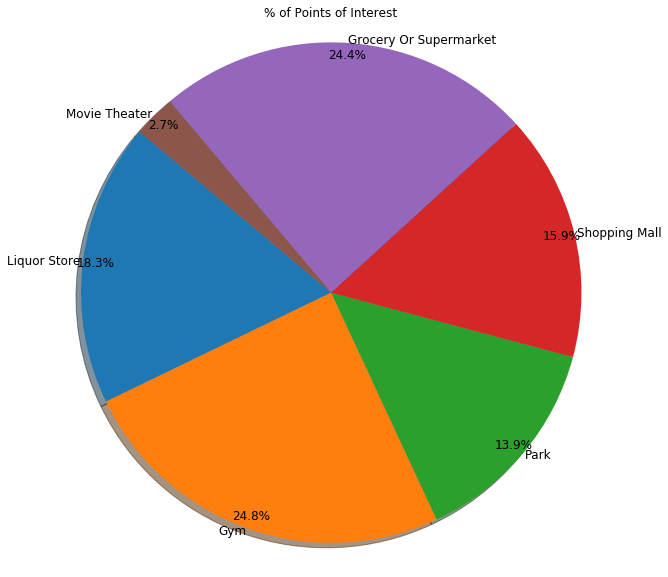

In [10]:
pie_plot(rst)

In [4]:
import zip_functions as zf

In [11]:
rst = zf.barfinder(lat, lng)
print(rst)

{'Liquor Store': 9, 'Gym': 44, 'Park': 102, 'Shopping Mall': 13, 'Grocery Or Supermarket': 36, 'Movie Theater': 1}


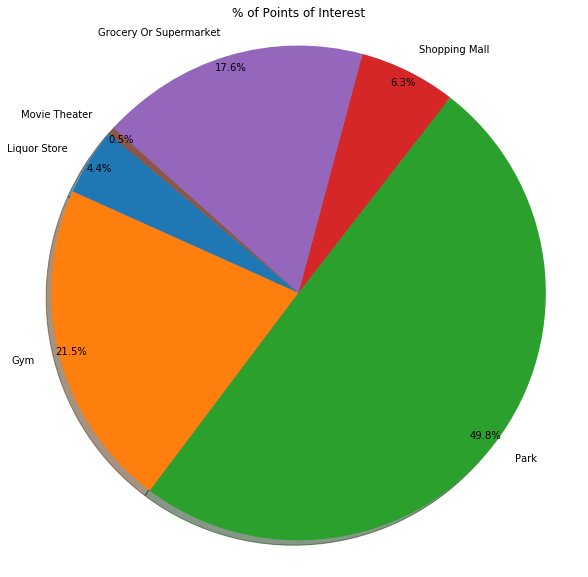

In [5]:
zf.pie_plot(zf.barfinder(lat,lng))

In [15]:
print(zipcodes.similar_to(target_zip[0], zips=zipcodes.filter_by(zipcodes.list_all(), active=True, city= city, state = state)))

[{'zip_code': '53186', 'zip_code_type': 'STANDARD', 'city': 'WAUKESHA', 'state': 'WI', 'lat': 43.01, 'long': -88.23, 'world_region': 'NA', 'country': 'US', 'active': True}, {'zip_code': '53187', 'zip_code_type': 'PO BOX', 'city': 'WAUKESHA', 'state': 'WI', 'lat': 43.01, 'long': -88.23, 'world_region': 'NA', 'country': 'US', 'active': True}, {'zip_code': '53188', 'zip_code_type': 'STANDARD', 'city': 'WAUKESHA', 'state': 'WI', 'lat': 43.01, 'long': -88.23, 'world_region': 'NA', 'country': 'US', 'active': True}, {'zip_code': '53189', 'zip_code_type': 'STANDARD', 'city': 'WAUKESHA', 'state': 'WI', 'lat': 43.01, 'long': -88.23, 'world_region': 'NA', 'country': 'US', 'active': True}]


In [12]:
city

'WAUKESHA'

In [32]:
def find_zip(target_zip, city, state):

    x = zipcodes.similar_to(target_zip[0], zips=zipcodes.filter_by(zipcodes.list_all(), active=True, city= city, state = state))
    zipps = []
    for zips in x:
        zipps.append(zips['zip_code'])
    
    print(zipps)
    return zipps

z = find_zip(target_zip, city, state)

['22301', '22302', '22303', '22304', '22305', '22306', '22307', '22308', '22309', '22310', '22311', '22312', '22313', '22314', '22315', '22320', '22331', '22332', '22333', '22334', '22350']


In [41]:
# Function to store Zillow home values and monthly rental prices for 2013-2017 quarters
# Function requires a zip code string; returns data frame

def get_home_data(zip, z):
    zip_code = int(zip)
    
    #create lists for the Zillow data 
    home_values=[]
    monthly_rentals=[]
    periods = []
    years=["2013","2014","2015","2016","2017"]
    months=["03","06","09","12"]
    
    
    ## Zillow Home Value Index (ZHVI) is a time series tracking the monthly median home value
    # get the data just for the input zip code
    try: 
        all_homes = pd.read_csv("Resources/Zip_Zhvi_AllHomes.csv")
        zc_all_homes = all_homes[all_homes["RegionName"] == zip_code].iloc[0]

        ## Zillow Rental Index (ZRI) is a time series tracking the monthly median rental
        all_rental_homes = pd.read_csv("Resources/Zip_Zri_AllHomes.csv")
        zc_all_rental_homes = all_rental_homes[all_rental_homes["RegionName"] == zip_code].iloc[0]

        #get the home value and monthly rental data for the years/months specified above
        for y in years:
            for m in months:
                col_name = "%s-%s" % (y,m)

                try:
                    #get the data for this column name
                    home_value = zc_all_homes[col_name]
                    rent = zc_all_rental_homes[col_name]
                    home_values.append(home_value)
                    monthly_rentals.append(rent)
                    periods.append(col_name)
                    #print(col_name, home_value, rent)
                except:
                    print("no value for: %s" % col_name)

        #store rent and house prices into a DF
        zillow_df=pd.DataFrame({"period": periods, 
                            "home_value": home_values,
                            "monthly_rent": monthly_rentals})
    except IndexError:
        p = {}
        for q in z:
            q = int(q)
            try:
                all_homes = pd.read_csv("Resources/Zip_Zhvi_AllHomes.csv")
                zc_all_homes = all_homes[all_homes["RegionName"] == q].iloc[0]

                ## Zillow Rental Index (ZRI) is a time series tracking the monthly median rental
                all_rental_homes = pd.read_csv("Resources/Zip_Zri_AllHomes.csv")
                zc_all_rental_homes = all_rental_homes[all_rental_homes["RegionName"] == q].iloc[0]

                #get the home value and monthly rental data for the years/months specified above
                for y in years:
                    for m in months:
                        col_name = "%s-%s" % (y,m)

                        try:
                            #get the data for this column name
                            home_value = zc_all_homes[col_name]
                            rent = zc_all_rental_homes[col_name]
                            home_values.append(home_value)
                            monthly_rentals.append(rent)
                            periods.append(col_name)
                            #print(col_name, home_value, rent)
                        except:
                            print("no value for: %s" % col_name)
                #store rent and house prices into a DF
                zillow_df=pd.DataFrame({"period": periods, 
                            "home_value": home_values,
                            "monthly_rent": monthly_rentals})
            except IndexError:
                next
    return zillow_df, periods                  

In [43]:
zillow_df, periods = get_home_data(target_zip, z)

no value for: 2017-12
no value for: 2017-12
no value for: 2017-12
no value for: 2017-12
no value for: 2017-12
no value for: 2017-12
no value for: 2017-12
no value for: 2017-12


In [51]:
df = zillow_df.groupby("period").mean()
df.head()

,home_value,monthly_rent
period,,
2013-03,404712.5,2279.125
2013-06,418337.5,2298.375
2013-09,432437.5,2304.375
2013-12,433012.5,2301.750
2014-03,433487.5,2290.375
